In [1]:
# load mudule
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys
import os

In [8]:
# which HOME directory
home = os.getenv("HOME")
home

'/Users/nora'

In [9]:
# load data from csv
csv_path = home + '/Pokemon.csv'
data = pd.read_csv(csv_path)
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [11]:
# data column
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# column description

Name : 포켓몬 이름. unique   
Type 1 : 속성. 모든 포켓몬이 기본으로 가진 값  
Type 2 : 속성. 없을 수도 있는 값  
Total : 스탯 총합  
HP : 체력  
Attack : 물리 공격력    
Defense : 물리 공격에 대한 방어력  
Sp. Atk : 특수 공격력    
Sp. Def : 특수 공격에 대한 방어력    
Speed : 선공권을 결정하는 스탯   
Generation : 포켓몬의 세대    
Legendary : boolean값. true or false   


In [29]:
# legendary pokemon
legendary = data[data['Legendary'] == True].reset_index(drop=True)
print(legendary.head())

# normal pokemon
normal = data[data['Legendary'] == False].reset_index(drop=True)
normal.head()

     #                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       95      125     85           1       True  
1      125       90    100           1       True  
2      125       85     90           1       True  
3      154       90    130           1       True  
4      154      100    130           1       True  


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [15]:
# check NaN
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [18]:
# another method; check NaN; compare Non-Null Count with RangeIndex
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [22]:
# analysis type1, type2
len(set(data['Type 1'])), len(set(data['Type 2']))

(18, 19)

In [23]:
# now we know type2 and type1 is same except for nan value
set(data['Type 2']) - set(data['Type 1'])

{nan}

In [ ]:
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [31]:
types = list(set(data['Type 1']))
types

['Flying',
 'Ground',
 'Dragon',
 'Rock',
 'Poison',
 'Electric',
 'Normal',
 'Fairy',
 'Water',
 'Psychic',
 'Ghost',
 'Grass',
 'Fire',
 'Dark',
 'Bug',
 'Ice',
 'Steel',
 'Fighting']

<AxesSubplot:xlabel='Type 1', ylabel='count'>

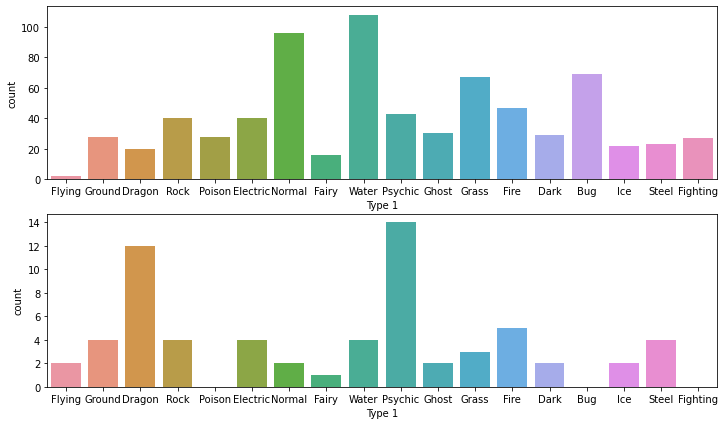

In [35]:
plt.figure(figsize=(12, 7))

plt.subplot(211)
sns.countplot(data=normal, x="Type 1", order=types)

plt.subplot(212)
sns.countplot(data=legendary, x='Type 1', order=types)

In [50]:
# what percent of legendary in data-set
dist_legd = pd.pivot_table(data, index="Type 1", values="Legendary").sort_values(by="Legendary", ascending=False)
dist_legd

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


In [48]:
# get the type of result
type(pd.pivot_table(data, index="Type 1", values="Legendary").sort_values(by="Legendary", ascending=False))

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Type 1'>

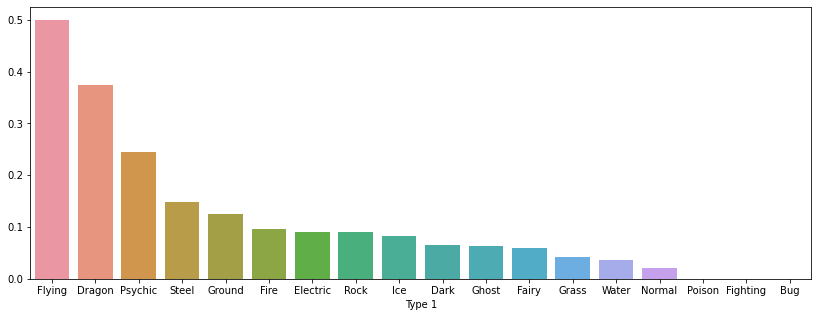

In [69]:
# plot density of legendary by Type 1
plt.figure(figsize=(14, 5))
sns.barplot(data=dist_legd.T)

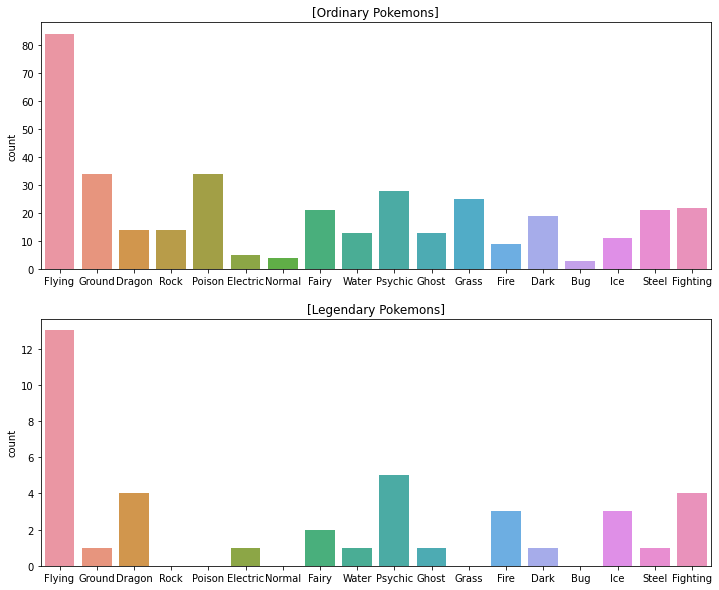

In [63]:
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=normal, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()